In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

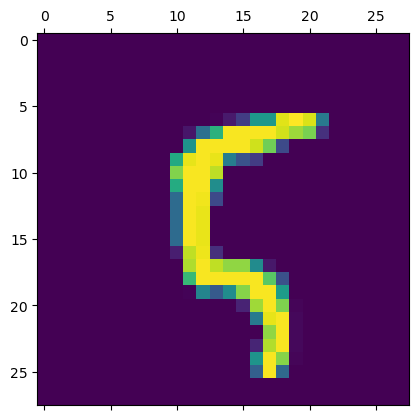

In [7]:
plt.matshow(X_train[100])

In [8]:
y_train[100]

5

In [9]:
type(X_train)

numpy.ndarray

In [10]:
type(y_train)

numpy.ndarray

In [13]:
X_train[100].shape

(28, 28)

In [14]:
y_train[100].shape

()

In [16]:
X_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [17]:
y_train[:2]

array([5, 0], dtype=uint8)

In [18]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train.shape[2]

28

In [24]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [25]:
X_train_flatten.shape

(60000, 784)

In [26]:
X_test_flatten.shape

(10000, 784)

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 678us/step - loss: 9.7402 - accuracy: 0.8406
Epoch 2/5
1875/1875 [==============================] - 1s 673us/step - loss: 6.0289 - accuracy: 0.8793
Epoch 3/5
1875/1875 [==============================] - 1s 675us/step - loss: 5.7234 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 1s 675us/step - loss: 5.5545 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 1s 675us/step - loss: 5.5278 - accuracy: 0.8868


In [30]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 646us/step - loss: 5.3671 - accuracy: 0.8918


[5.367100238800049, 0.8917999863624573]

In [31]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 470us/step


array([0.0000000e+00, 0.0000000e+00, 2.7927964e-13, 1.0000000e+00,
       2.7908879e-37, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

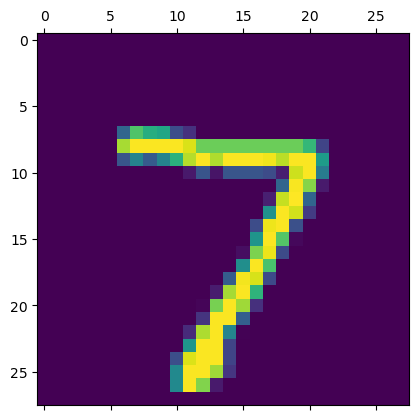

In [32]:
plt.matshow(X_test[0])

In [34]:
np.argmax(y_predicted[0])
# it seems that the prediction is not very good.

3

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [36]:
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [37]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    2,    2,    1,    2,    0,    0,    1],
       [   5, 1125,    4,    0,    1,    0,    0,    0,    0,    0],
       [  97,  152,  767,    5,    7,    3,    0,    1,    0,    0],
       [  96,   54,  488,  370,    0,    0,    0,    2,    0,    0],
       [  18,   62,  136,  127,  639,    0,    0,    0,    0,    0],
       [ 130,   18,  206,  302,   49,  182,    1,    0,    3,    1],
       [  88,   15,  590,   17,   77,   39,  132,    0,    0,    0],
       [  12,   41,  210,  567,   44,   30,    0,  124,    0,    0],
       [  49,  152,  502,   87,   28,  119,    5,    2,   29,    1],
       [  14,   47,   85,  415,  387,   11,    0,   43,    5,    2]])>

Text(95.72222222222221, 0.5, 'Truth')

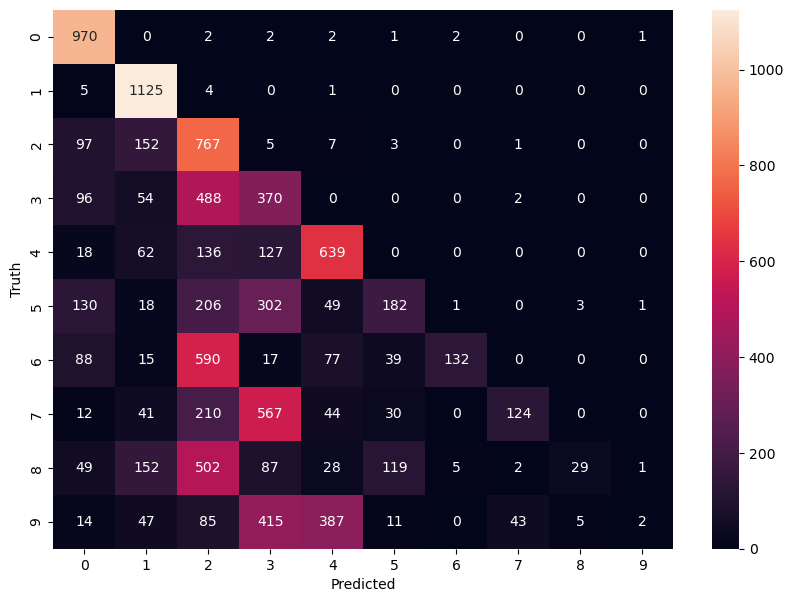

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8460 - accuracy: 0.8423
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9248
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2084 - accuracy: 0.9414
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1747 - accuracy: 0.9507
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1524 - accuracy: 0.9574
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1410 - accuracy: 0.9598
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1284 - accuracy: 0.9639
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1161 - accuracy: 0.9666
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.9690
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.101

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.1434 - accuracy: 0.9633


[0.1434304118156433, 0.9632999897003174]